In [458]:
from matplotlib import pyplot as plt
import numpy as np
import random
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import pandas as pd

seed=123
random.seed(seed)
np.random.seed(seed)

# 1. Load the dataset
lets's first load our dataset and print the header and footer rows

In [459]:
df = pd.read_csv('Singapore_BCA_2017_cleaned.csv')
df

,BuildingName,BuildingAddress,BuildingType,BuildingSize,PublicSector,YearObtainedTOP_CSC,GreenMarkYearofAward,GreenMarkRating,GreenMarkStatus,GrossFloorArea_M2,...,PercentageUsageOfLED,InstallationOfSolarPV,EUI2015_kWhM2Yr,EUI2016_kWhM2Yr,EUI2017_kWhM2Yr,EUIPerformanceComparedToPreviousYear,Benchmarking_EUI_Quartile,VoluntaryDisclosure,BuildingAge,TotalEnergy2017
0,FUJI XEROX TOWERS,"80 ANSON ROAD, SINGAPORE 079907",Office Building,Large,No,1989.0,2014.0,Platinum,Yes,48688.0,...,50.0,N,186.2,181.3,169.3,Improved,2nd Quartile,Y,29.0,8242878.4
1,CITY SQUARE MALL,"180 KITCHENER ROAD, SINGAPORE 208539",Retail Building,Large,No,2009.0,2015.0,Platinum,Yes,65640.0,...,75.0,Y,392.5,384.9,382.2,Improved,2nd Quartile,Y,9.0,25087608.0
2,REPUBLIC PLAZA,"9 RAFFLES PLACE, SINGAPORE 048619",Office Building,Large,No,1998.0,2014.0,Platinum,Yes,102356.0,...,4.0,N,244.9,242.7,212.4,Improved,3rd Quartile,Y,20.0,21740414.4
3,CENTRAL MALL,"1 MAGAZINE ROAD, SINGAPORE 059567",Office Building,Large,No,1999.0,2017.0,Platinum,Yes,15769.0,...,50.0,N,210.5,197.4,202.8,Worsened,3rd Quartile,Y,19.0,3197953.2
4,ONE KM,"11 TANJONG KATONG ROAD, SINGAPORE 437157",Retail Building,Large,No,2014.0,2015.0,Gold,Yes,28938.0,...,31.0,N,466.6,462.7,430.7,Improved,3rd Quartile,Y,4.0,12463596.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140,VANGUARD BUILDING,"71 STAMFORD ROAD, SINGAPORE 178895",Office Building,Small,No,1901.0,NaN,Not Certified,No,2900.0,...,0.0,N,289.3,323.9,263.1,Improved,Bottom Quartile,Y,117.0,762990.0
1141,NaN,NaN,Educational Institution,NaN,NaN,NaN,NaN,NaN,No,NaN,...,NaN,NaN,171.7,150.0,148.7,Improved,NaN,NaN,NaN,NaN
1142,WILKIE EDGE,"8 WILKIE ROAD, SINGAPORE 228095",Office Building,Large,No,2008.0,2016.0,Gold,Yes,29812.0,...,20.0,N,271.6,268.0,261.6,Improved,Bottom Quartile,Y,10.0,7798819.2
1143,NaN,NaN,Retail Building,Large,NaN,NaN,NaN,NaN,No,NaN,...,NaN,NaN,124.5,128.5,112.2,Improved,Top Quartile,N,NaN,NaN


In [460]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1145 entries, 0 to 1144
Data columns (total 27 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   BuildingName                                    643 non-null    object 
 1   BuildingAddress                                 802 non-null    object 
 2   BuildingType                                    1145 non-null   object 
 3   BuildingSize                                    957 non-null    object 
 4   PublicSector                                    802 non-null    object 
 5   YearObtainedTOP_CSC                             802 non-null    float64
 6   GreenMarkYearofAward                            208 non-null    float64
 7   GreenMarkRating                                 802 non-null    object 
 8   GreenMarkStatus                                 1145 non-null   object 
 9   GrossFloorArea_M2                        

In [461]:
df.describe()

,YearObtainedTOP_CSC,GreenMarkYearofAward,GrossFloorArea_M2,PercentageOfAirconditionedFloorArea,AverageMonthlyBuildingOccupancyRate_percentage,NumberOfHotelRooms,AgeOfNewestChiller_Airconditioner,CentralisedAirconditioningPlantEfficiency_kWRT,YearOfLastChillerPlantAuditHealthCheck,PercentageUsageOfLED,EUI2015_kWhM2Yr,EUI2016_kWhM2Yr,EUI2017_kWhM2Yr,BuildingAge,TotalEnergy2017
count,802.000000,208.000000,802.000000,802.000000,802.000000,258.000000,783.000000,231.000000,190.000000,802.000000,1145.000000,1145.000000,1145.000000,802.000000,8.020000e+02
mean,1994.442643,2013.961538,22431.937656,78.448878,85.304239,222.639535,7.336462,0.770390,2014.763158,28.523691,270.797817,274.231790,266.577642,23.557357,6.308383e+06
std,17.706790,2.331979,43717.330939,20.761183,17.014783,677.918373,6.732357,0.268866,2.279820,35.660069,197.250655,192.460306,185.580283,17.706790,1.404079e+07
min,1900.000000,2007.000000,107.000000,0.000000,1.000000,1.000000,0.000000,0.500000,2002.000000,0.000000,-13.000000,10.700000,9.300000,1.000000,6.086400e+03
25%,1986.000000,2013.000000,2027.500000,70.000000,80.000000,33.000000,3.000000,0.630000,2013.250000,0.000000,157.700000,157.300000,153.500000,10.000000,3.785570e+05
50%,1997.000000,2014.000000,8718.500000,83.000000,90.000000,73.500000,5.000000,0.680000,2015.000000,10.000000,231.700000,234.700000,223.000000,21.000000,1.985386e+06
75%,2008.000000,2016.000000,25852.250000,94.000000,100.000000,240.000000,10.000000,0.830000,2016.000000,55.000000,333.100000,339.400000,328.900000,32.000000,6.836125e+06
max,2017.000000,2017.000000,581511.000000,100.000000,100.000000,9999.000000,40.000000,3.340000,2017.000000,100.000000,2882.500000,2676.600000,2602.400000,118.000000,1.750930e+08


# 2. Extract only the Hotel

In [463]:
dfn = df[df.BuildingType == 'Retail Building']
dfn

,BuildingName,BuildingAddress,BuildingType,BuildingSize,PublicSector,YearObtainedTOP_CSC,GreenMarkYearofAward,GreenMarkRating,GreenMarkStatus,GrossFloorArea_M2,...,PercentageUsageOfLED,InstallationOfSolarPV,EUI2015_kWhM2Yr,EUI2016_kWhM2Yr,EUI2017_kWhM2Yr,EUIPerformanceComparedToPreviousYear,Benchmarking_EUI_Quartile,VoluntaryDisclosure,BuildingAge,TotalEnergy2017
1,CITY SQUARE MALL,"180 KITCHENER ROAD, SINGAPORE 208539",Retail Building,Large,No,2009.0,2015.0,Platinum,Yes,65640.0,...,75.0,Y,392.5,384.9,382.2,Improved,2nd Quartile,Y,9.0,25087608.0
4,ONE KM,"11 TANJONG KATONG ROAD, SINGAPORE 437157",Retail Building,Large,No,2014.0,2015.0,Gold,Yes,28938.0,...,31.0,N,466.6,462.7,430.7,Improved,3rd Quartile,Y,4.0,12463596.6
17,NaN,"33 LORONG 12 GEYLANG, SINGAPORE 399007",Retail Building,Small,No,1998.0,NaN,Not Certified,No,400.0,...,0.0,N,370.3,372.1,343.5,Improved,2nd Quartile,Y,20.0,137400.0
26,SIXTH AVENUE CENTRE,"805 BUKIT TIMAH ROAD, SINGAPORE 279883",Retail Building,Small,No,1988.0,NaN,Not Certified,No,1323.0,...,0.0,N,423.4,445.6,403.1,Improved,3rd Quartile,Y,30.0,533301.3
28,CROWN CENTRE,"557 BUKIT TIMAH ROAD, SINGAPORE 269694",Retail Building,Small,No,1990.0,NaN,Not Certified,No,2250.0,...,95.0,N,442.3,472.2,444.7,Improved,3rd Quartile,Y,28.0,1000575.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118,CITYVIBE,"3151 COMMONWEALTH AVENUE WEST, SINGAPORE 129581",Retail Building,Small,No,2009.0,NaN,Not Certified,No,4325.0,...,0.0,N,480.4,420.1,374.7,Improved,3rd Quartile,Y,9.0,1620577.5
1119,THE WOODGROVE,"30 WOODLANDS AVENUE 1, SINGAPORE 739065",Retail Building,Small,No,2000.0,NaN,Not Certified,No,10000.0,...,0.0,N,305.8,300.0,270.5,Improved,2nd Quartile,Y,18.0,2705000.0
1123,NaN,"181 UPPER THOMSON ROAD, SINGAPORE 574331",Retail Building,Small,No,2013.0,2014.0,Gold,Yes,578.0,...,40.0,Y,296.8,289.3,277.0,Improved,2nd Quartile,Y,5.0,160106.0
1132,TELOK BLANGAH HOUSE,"52 TELOK BLANGAH ROAD, SINGAPORE 098829",Retail Building,Small,No,1985.0,NaN,Not Certified,No,5555.0,...,100.0,N,82.0,82.4,82.0,Improved,Top Quartile,Y,33.0,455510.0


In [464]:
dfn.describe()

,YearObtainedTOP_CSC,GreenMarkYearofAward,GrossFloorArea_M2,PercentageOfAirconditionedFloorArea,AverageMonthlyBuildingOccupancyRate_percentage,NumberOfHotelRooms,AgeOfNewestChiller_Airconditioner,CentralisedAirconditioningPlantEfficiency_kWRT,YearOfLastChillerPlantAuditHealthCheck,PercentageUsageOfLED,EUI2015_kWhM2Yr,EUI2016_kWhM2Yr,EUI2017_kWhM2Yr,BuildingAge,TotalEnergy2017
count,145.000000,47.000000,145.000000,145.000000,145.000000,10.000000,140.000000,53.000000,41.000000,145.000000,175.000000,175.000000,175.000000,145.000000,1.450000e+02
mean,1998.220690,2013.893617,27269.372414,76.682759,89.455172,345.300000,7.242857,0.752264,2014.975610,35.331034,398.951429,399.820571,389.354286,19.779310,9.826944e+06
std,12.391456,2.622926,53367.512195,23.210900,15.863996,599.107308,6.724669,0.203618,1.753394,36.862179,212.658809,201.219743,195.712175,12.391456,1.840129e+07
min,1968.000000,2007.000000,162.000000,1.000000,9.000000,1.000000,0.000000,0.530000,2010.000000,0.000000,0.000000,49.500000,56.700000,2.000000,8.787000e+04
25%,1988.000000,2013.000000,4325.000000,65.000000,89.000000,13.250000,2.750000,0.650000,2014.000000,0.000000,248.200000,248.900000,234.050000,8.000000,1.457430e+06
50%,1998.000000,2014.000000,11260.000000,84.000000,95.000000,60.500000,5.000000,0.680000,2015.000000,20.000000,388.800000,406.300000,375.000000,20.000000,4.376348e+06
75%,2010.000000,2016.000000,29413.000000,96.000000,100.000000,213.000000,10.000000,0.790000,2016.000000,70.000000,517.900000,520.400000,500.150000,30.000000,1.225770e+07
max,2016.000000,2017.000000,452045.000000,100.000000,100.000000,1614.000000,40.000000,1.750000,2017.000000,100.000000,1601.700000,1604.100000,1537.300000,50.000000,1.692019e+08


# 3. Data cleaning

In [465]:
columns_to_include = ['BuildingType',
                      'BuildingSize',
                      'GrossFloorArea_M2',
                      'PercentageOfAirconditionedFloorArea',
                      'PercentageUsageOfLED',
                      'BuildingAge',
                      'AverageMonthlyBuildingOccupancyRate_percentage',
                      'TotalEnergy2017']
dfn = dfn[columns_to_include]

dfn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 1 to 1143
Data columns (total 8 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   BuildingType                                    175 non-null    object 
 1   BuildingSize                                    175 non-null    object 
 2   GrossFloorArea_M2                               145 non-null    float64
 3   PercentageOfAirconditionedFloorArea             145 non-null    float64
 4   PercentageUsageOfLED                            145 non-null    float64
 5   BuildingAge                                     145 non-null    float64
 6   AverageMonthlyBuildingOccupancyRate_percentage  145 non-null    float64
 7   TotalEnergy2017                                 145 non-null    float64
dtypes: float64(6), object(2)
memory usage: 12.3+ KB


In [466]:
dfn['AirconFA'] = round(dfn['GrossFloorArea_M2'] * dfn['PercentageOfAirconditionedFloorArea'] / 100)
dfn['NonAirconFA'] = dfn['GrossFloorArea_M2'] - dfn['AirconFA']
dfn

C:\Users\praveenp1\AppData\Local\Temp\3\ipykernel_19732\4075213146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfn['AirconFA'] = round(dfn['GrossFloorArea_M2'] * dfn['PercentageOfAirconditionedFloorArea'] / 100)
C:\Users\praveenp1\AppData\Local\Temp\3\ipykernel_19732\4075213146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfn['NonAirconFA'] = dfn['GrossFloorArea_M2'] - dfn['AirconFA']


,BuildingType,BuildingSize,GrossFloorArea_M2,PercentageOfAirconditionedFloorArea,PercentageUsageOfLED,BuildingAge,AverageMonthlyBuildingOccupancyRate_percentage,TotalEnergy2017,AirconFA,NonAirconFA
1,Retail Building,Large,65640.0,62.0,75.0,9.0,93.0,25087608.0,40697.0,24943.0
4,Retail Building,Large,28938.0,100.0,31.0,4.0,90.0,12463596.6,28938.0,0.0
17,Retail Building,Small,400.0,100.0,0.0,20.0,70.0,137400.0,400.0,0.0
26,Retail Building,Small,1323.0,99.0,0.0,30.0,100.0,533301.3,1310.0,13.0
28,Retail Building,Small,2250.0,100.0,95.0,28.0,100.0,1000575.0,2250.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1118,Retail Building,Small,4325.0,60.0,0.0,9.0,95.0,1620577.5,2595.0,1730.0
1119,Retail Building,Small,10000.0,60.0,0.0,18.0,90.0,2705000.0,6000.0,4000.0
1123,Retail Building,Small,578.0,95.0,40.0,5.0,80.0,160106.0,549.0,29.0
1132,Retail Building,Small,5555.0,58.0,100.0,33.0,100.0,455510.0,3222.0,2333.0


In [467]:
dfn = dfn.dropna()
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 1 to 1132
Data columns (total 10 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   BuildingType                                    145 non-null    object 
 1   BuildingSize                                    145 non-null    object 
 2   GrossFloorArea_M2                               145 non-null    float64
 3   PercentageOfAirconditionedFloorArea             145 non-null    float64
 4   PercentageUsageOfLED                            145 non-null    float64
 5   BuildingAge                                     145 non-null    float64
 6   AverageMonthlyBuildingOccupancyRate_percentage  145 non-null    float64
 7   TotalEnergy2017                                 145 non-null    float64
 8   AirconFA                                        145 non-null    float64
 9   NonAirconFA                               

# 4. Exploratory Data Analysis

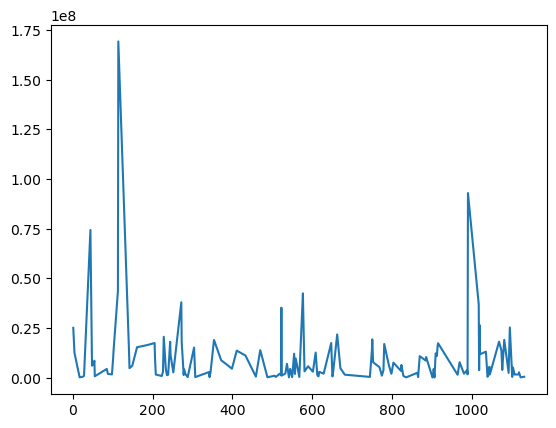

In [468]:
dfn['TotalEnergy2017'].plot()
plt.show()

## Plot correlations

C:\Users\praveenp1\AppData\Local\Temp\3\ipykernel_19732\1061781310.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sb.heatmap(dfn.corr(), cmap="YlGnBu", annot=True)


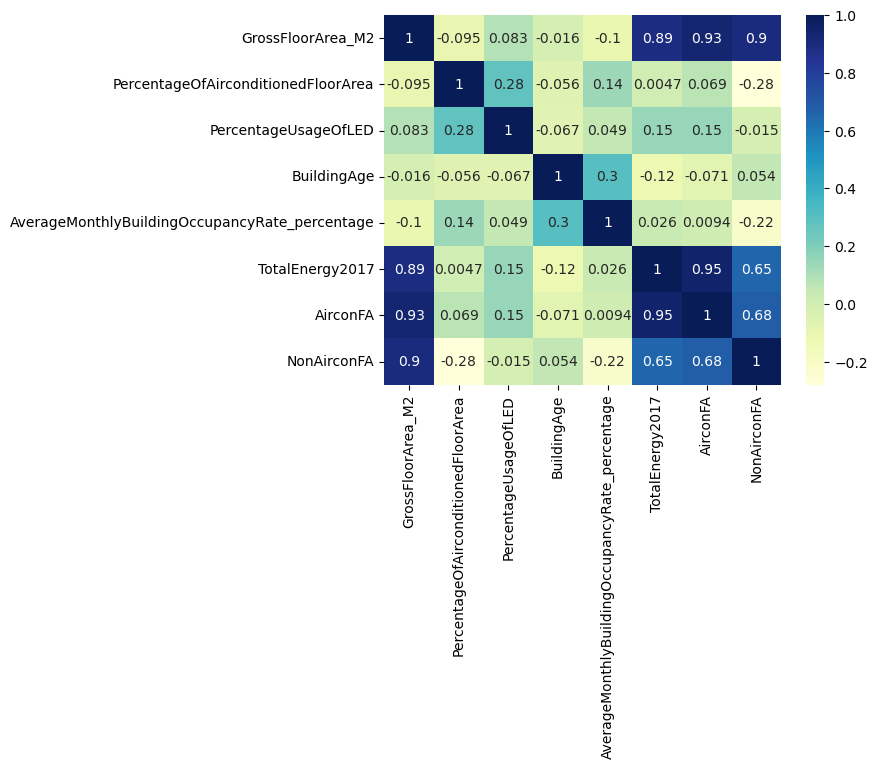

In [469]:
import seaborn as sb 
dataplot = sb.heatmap(dfn.corr(), cmap="YlGnBu", annot=True) 
plt.show() 

## Scatter Plot

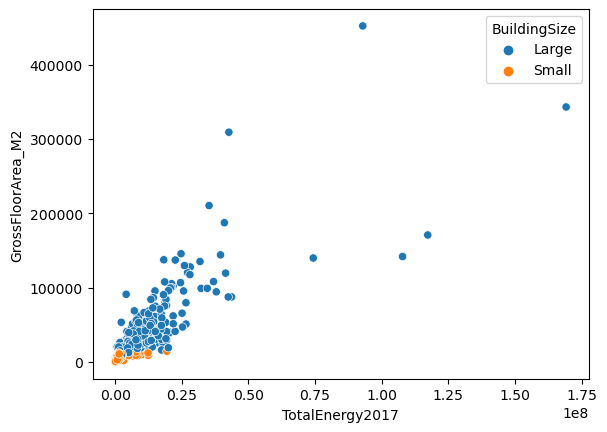

In [470]:
sb.scatterplot(x='TotalEnergy2017', y='GrossFloorArea_M2', data=df, hue='BuildingSize')
plt.show()

# 5. Model development

In [471]:
def prepare_dataset(df):
    y_col = 'TotalEnergy2017'
    x_cols = ['AirconFA', 'NonAirconFA', 'BuildingAge']

    X = np.array(df[x_cols])
    y = np.array(df[y_col])
    return X, y    

## 5.1 OLS Regression

In [472]:
import statsmodels.api as sm

def fit_ols(X_train, y_train):
    model = sm.OLS(y_train, X_train).fit()
    return model    

In [473]:
X, y = prepare_dataset(dfn)
X_train,X_test,y_train,y_test = train_test_split (X,y,test_size=0.2,random_state=3)
ols = fit_ols(X_train, y_train)
mS=ols.params

### Prediction against Test - OLS

RMSE Error OLS 9569765.593056621


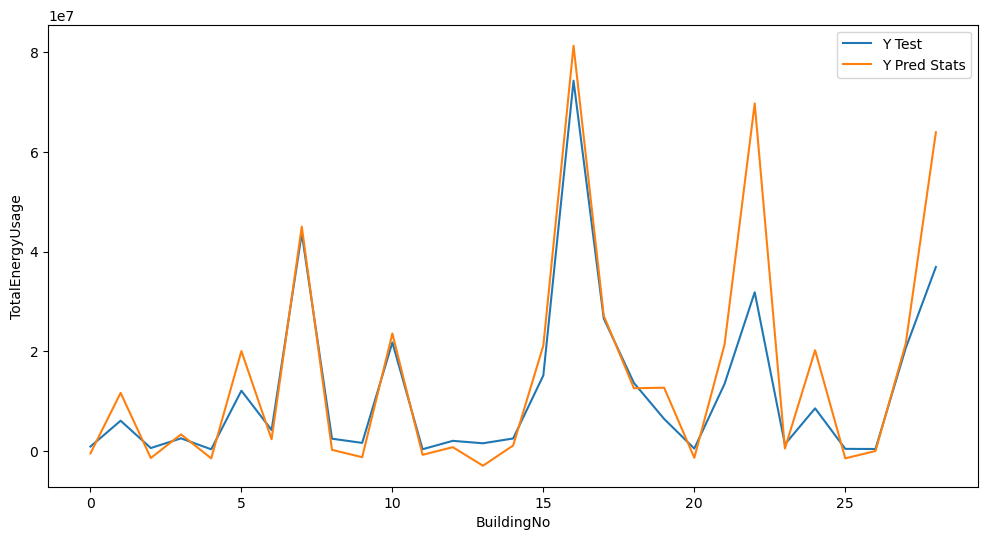

In [474]:
y_predS = ols.predict(X_test)
rmseS=np.sqrt(np.mean((y_test-y_predS)**2))
print('RMSE Error OLS',rmseS)

plt.figure(figsize=(12,6))
plt.plot(y_test,label ='Y Test')
plt.plot(y_predS,label = 'Y Pred Stats')
plt.xlabel('BuildingNo')
plt.ylabel('TotalEnergyUsage')

plt.legend()
    


## 5.2 Linear Regression

In [475]:
def fit_linreg(X_train, y_train):
    reg= LinearRegression().fit(X_train,y_train)
    return reg 

In [476]:
reg= fit_linreg(X_train, y_train)
R=reg.score(X_train,y_train)
m=reg.coef_
yz = reg.intercept_
print("model",m,yz,R)
len(X)

model [ 6.17230805e+02 -4.53766868e+01 -9.13067053e+04] 465082.58400473185 0.922690647914125


145

### Prediction against Test -Linear Regression

RMSE ERROR Lin.Reg 9517430.20433757


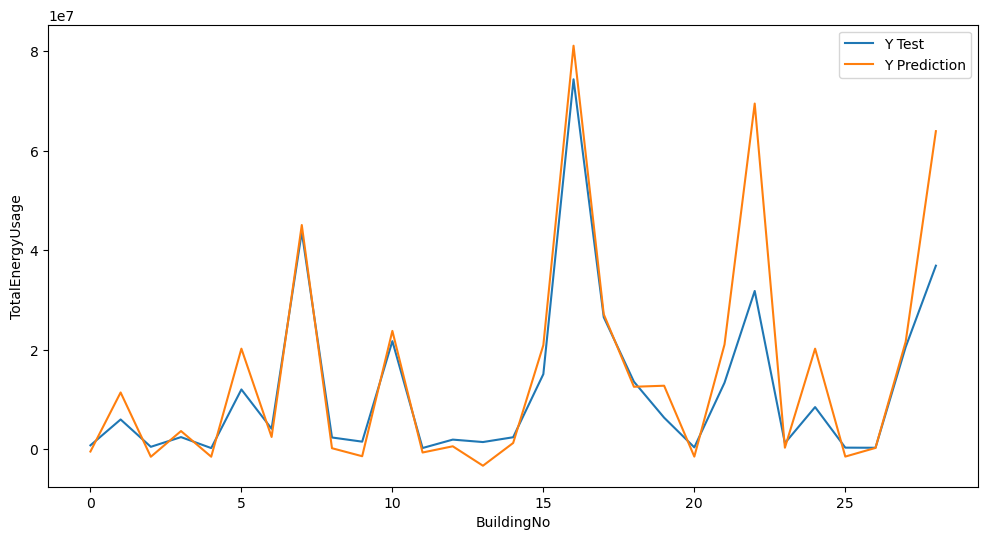

In [477]:
y_pred = reg.predict(X_test)
rmse=np.sqrt(np.mean((y_test-y_pred)**2))
print('RMSE ERROR Lin.Reg',rmse)

plt.figure(figsize=(12,6))
plt.plot(y_test,label ='Y Test')
plt.plot(y_pred,label = 'Y Prediction')
plt.xlabel('BuildingNo')
plt.ylabel('TotalEnergyUsage')

plt.legend()

## 5.3 Linear Regression with Ridge Regularisation

In [478]:
def fit_linridge(X_train, y_train,alpha):
    reg= Ridge().fit(X_train,y_train,alpha)
    return reg 

In [479]:
# regl2 = Ridge(alpha=0.9)
# regl2.fit(X_train, y_train)
alpha = 0.9
regl2= fit_linridge(X_train,y_train,alpha)

R2l2=regl2.score(X_train,y_train)
mr=regl2.coef_
yzr = regl2.intercept_

print("Ridge model",mr,yzr,R2l2)

Ridge model [ 6.17231167e+02 -4.53771737e+01 -9.13010576e+04] 464969.99398446083 0.9226906478999748


### Prediction against Test - Ridge Regression

RMSE ERROR Rridge Reg 9517427.956199262


Text(0, 0.5, 'TotalEnergyUsage')

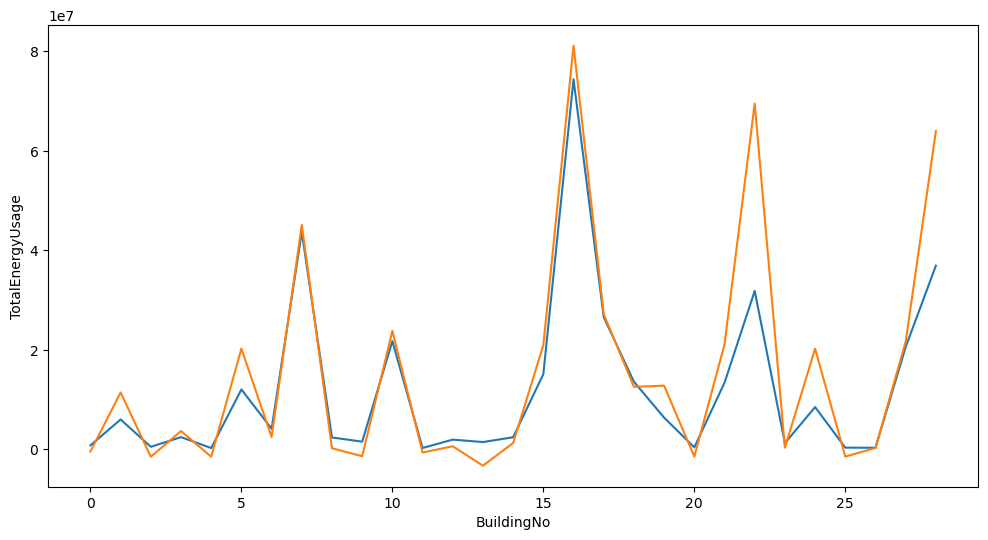

In [480]:
y_predr = regl2.predict(X_test)
rmser=np.sqrt(np.mean((y_test-y_predr)**2))
print('RMSE ERROR Rridge Reg',rmser)

plt.figure(figsize=(12,6))
plt.plot(y_test,label ='Y Test')
plt.plot(y_predr,label = 'Y Prediction')
plt.xlabel('BuildingNo')
plt.ylabel('TotalEnergyUsage')

## 5.4 Linear Regression with Lasso Regularisation

In [481]:
def fit_linlasso(X_train, y_train,alpha):
    reg= Lasso().fit(X_train,y_train,alpha)
    return reg 

In [482]:
# regl1 = Lasso(alpha=0.9)
# regl1.fit(X_train, y_train)
alpha =0.9
regl1 = fit_linlasso(X_train, y_train,alpha)
R2l1=regl1.score(X_train,y_train)
ml=regl1.coef_
yzl = regl1.intercept_ 
print("Lasso model",ml,yzl,R2l1)

Lasso model [ 6.17230806e+02 -4.53766874e+01 -9.13066989e+04] 465082.4553264696 0.922690647914125


### Prediction against Test - Lasso Regression

RMSE ERROR Rridge Reg 9517430.201629803


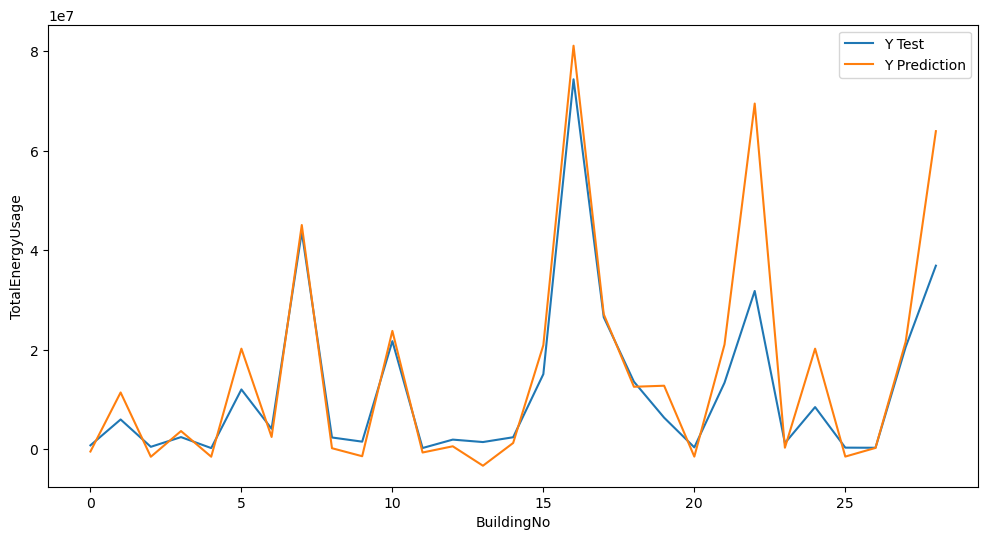

In [483]:
y_predl = regl1.predict(X_test)
rmsel=np.sqrt(np.mean((y_test-y_predl)**2))
print('RMSE ERROR Rridge Reg',rmsel)

plt.figure(figsize=(12,6))
plt.plot(y_test,label ='Y Test')
plt.plot(y_predl,label = 'Y Prediction')
plt.xlabel('BuildingNo')
plt.ylabel('TotalEnergyUsage')

plt.legend()

## 5.5 Model Comparison - OLS, Lin Reg, Ridge and Lasso

### Co-efficients

In [484]:
print('Coefficients')
print('LR',m)
print('Lasso',ml)
print ('Ridge',mr)
print('OLS SM',mS[:])
print('Intercepts')
print(yz,yzl,yzr)

Coefficients
LR [ 6.17230805e+02 -4.53766868e+01 -9.13067053e+04]
Lasso [ 6.17230806e+02 -4.53766874e+01 -9.13066989e+04]
Ridge [ 6.17231167e+02 -4.53771737e+01 -9.13010576e+04]
OLS SM [ 6.21648439e+02 -4.83689392e+01 -7.62301396e+04]
Intercepts
465082.58400473185 465082.4553264696 464969.99398446083


### RMSE Testing Error

In [485]:
print('LR:',rmse,'Lasso:',rmsel,'Ridge:',rmser,'OLS:',rmseS)

LR: 9517430.20433757 Lasso: 9517430.201629803 Ridge: 9517427.956199262 OLS: 9569765.593056621


## 5.6 Decision Tree Regression

In [486]:
from sklearn.tree import DecisionTreeRegressor
def fit_dtreg(X_train, y_train, max_depth):
    reg = DecisionTreeRegressor(max_depth=max_depth)
    reg.fit(X_train, y_train)
    return reg


###  Decision Tree with two depths

In [487]:
# regr_1 = DecisionTreeRegressor(max_depth=2)
# regr_2 = DecisionTreeRegressor(max_depth=5)
# regr_1.fit(X_train, y_train)
# regr_2.fit(X_train, y_train)

regr_1 = fit_dtreg(X_train, y_train,max_depth=2)
regr_2 = fit_dtreg(X_train, y_train,max_depth=5)
# regr_1.fit(X_train, y_train)
# regr_2.fit(X_train, y_train)

### Prediction results

In [488]:
ypred_1 = regr_1.predict(X_test)
ypred_2 = regr_2.predict(X_test)
rmsedr1=np.sqrt(np.mean((y_test-ypred_1)**2))
rmsedr2=np.sqrt(np.mean((y_test-ypred_2)**2))

print('RMSE ERROR Dec Tree Reg',rmsedr1,rmsedr2)

RMSE ERROR Dec Tree Reg 13799462.930931566 7166409.780356961


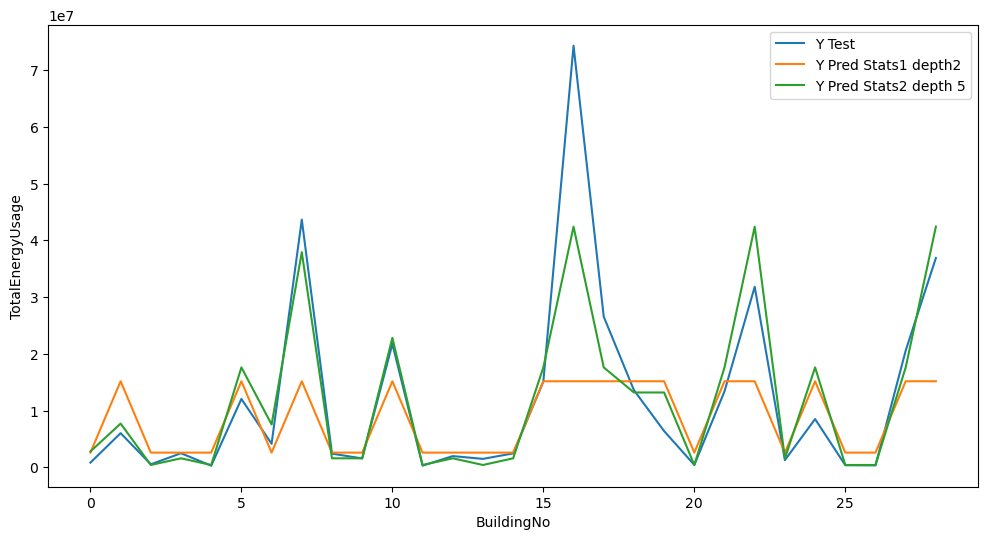

In [489]:
plt.figure(figsize=(12,6))
plt.plot(y_test,label ='Y Test')
plt.plot(ypred_1,label = 'Y Pred Stats1 depth2')
plt.plot(ypred_2,label = 'Y Pred Stats2 depth 5')
plt.xlabel('BuildingNo')
plt.ylabel('TotalEnergyUsage')

plt.legend()

### Decision Trees

[Text(0.5, 0.8333333333333334, 'x[0] <= 142828.5\nsquared_error = 349048126854534.8\nsamples = 116\nvalue = 9252825.314'),
 Text(0.25, 0.5, 'x[0] <= 16593.5\nsquared_error = 64818623115634.55\nsamples = 114\nvalue = 7116057.797'),
 Text(0.125, 0.16666666666666666, 'squared_error = 5693506731136.64\nsamples = 73\nvalue = 2593046.774'),
 Text(0.375, 0.16666666666666666, 'squared_error = 68812131235564.875\nsamples = 41\nvalue = 15169223.766'),
 Text(0.75, 0.5, 'x[2] <= 19.5\nsquared_error = 1455676303938934.0\nsamples = 2\nvalue = 131048573.75'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 169201900.0'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 92895247.5')]

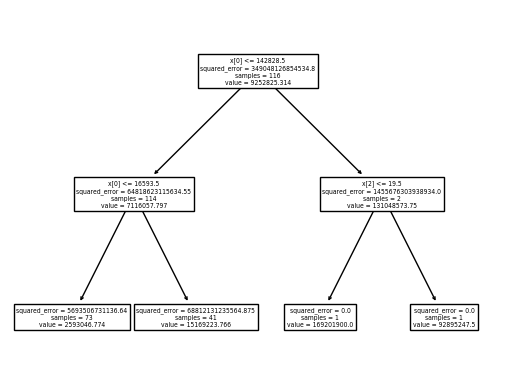

In [490]:
from sklearn.tree import export_graphviz  
from sklearn import tree
# export the decision tree to a tree.dot file 
# for visualizing the plot easily anywhere 
export_graphviz(regr_2, out_file ='tree.dot')  
tree.plot_tree(regr_1)

[Text(0.728448275862069, 0.9166666666666666, 'x[0] <= 142828.5\nsquared_error = 349048126854534.8\nsamples = 116\nvalue = 9252825.314'),
 Text(0.5431034482758621, 0.75, 'x[0] <= 16593.5\nsquared_error = 64818623115634.61\nsamples = 114\nvalue = 7116057.797'),
 Text(0.27586206896551724, 0.5833333333333334, 'x[0] <= 6803.5\nsquared_error = 5693506731136.657\nsamples = 73\nvalue = 2593046.774'),
 Text(0.13793103448275862, 0.4166666666666667, 'x[1] <= 2600.5\nsquared_error = 1631800427403.504\nsamples = 50\nvalue = 1437047.594'),
 Text(0.06896551724137931, 0.25, 'x[0] <= 2078.0\nsquared_error = 704159061967.289\nsamples = 41\nvalue = 1044120.532'),
 Text(0.034482758620689655, 0.08333333333333333, 'squared_error = 126905621539.694\nsamples = 19\nvalue = 413319.137'),
 Text(0.10344827586206896, 0.08333333333333333, 'squared_error = 562257691476.915\nsamples = 22\nvalue = 1588903.555'),
 Text(0.20689655172413793, 0.25, 'x[1] <= 6841.5\nsquared_error = 1950278544291.77\nsamples = 9\nvalue = 32

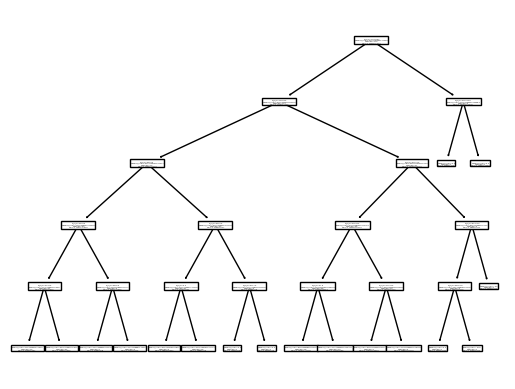

In [491]:
tree.plot_tree(regr_2)

# 5.7 Support Vector Regression

In [492]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
def fit_svreg(X_train, y_train, kernel,C):
    reg = SVR(kernel=kernel,C=C)
    reg.fit(X_train, y_train)
    return reg

In [493]:
# sc_X = StandardScaler()
# sc_y = StandardScaler()

# X2 = sc_X.fit_transform(X_train)
# y = sc_y.fit_transform(y_train.reshape(-1, 1))

# my_regressor = SVR(kernel='rbf', C=0.5)
# regsv = my_regressor.fit(X2, y.ravel())

# X_test2 = sc_X.transform(X_test)

In [494]:
sc_X = StandardScaler()
sc_y = StandardScaler()

X2 = sc_X.fit_transform(X_train)
y = sc_y.fit_transform(y_train.reshape(-1, 1))

# my_regressor = SVR(kernel='rbf', C=0.5)

regsv = fit_svreg(X2,y.ravel(),'rbf', C=3.0)
X_test2 = sc_X.transform(X_test)

## Prediction Results

RMSE: 7321661.325227017


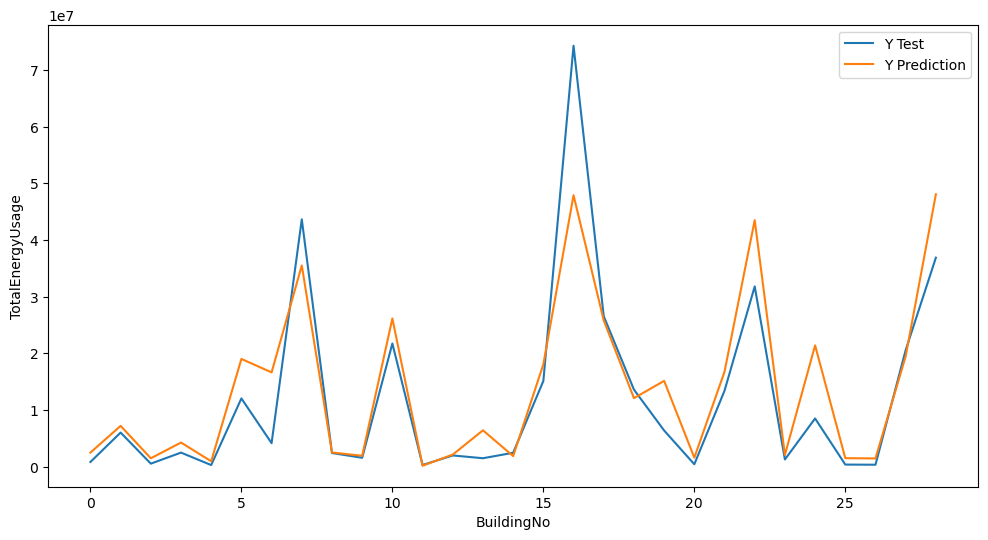

In [495]:
ypredsv = regsv.predict(X_test2)
ypredsv = ypredsv.reshape(-1, 1)
y_pred_original_scale = sc_y.inverse_transform(ypredsv)

# Calculate the RMSE in the original scale
rmsesv = np.sqrt(mean_squared_error(y_test, y_pred_original_scale))
print("RMSE:", rmsesv)

plt.figure(figsize=(12,6))
plt.plot(y_test,label ='Y Test')
plt.plot(y_pred_original_scale,label = 'Y Prediction')
plt.xlabel('BuildingNo')
plt.ylabel('TotalEnergyUsage')

plt.legend()

# 5.8 Regression Model Comparisons

In [496]:
print('LR:',rmse,'Lasso:',rmsel,'Ridge:',rmser,'OLS:',rmseS,'DT2:',rmsedr1,'DT5:',rmsedr2,'SVR:',rmsesv)


LR: 9517430.20433757 Lasso: 9517430.201629803 Ridge: 9517427.956199262 OLS: 9569765.593056621 DT2: 13799462.930931566 DT5: 7166409.780356961 SVR: 7321661.325227017


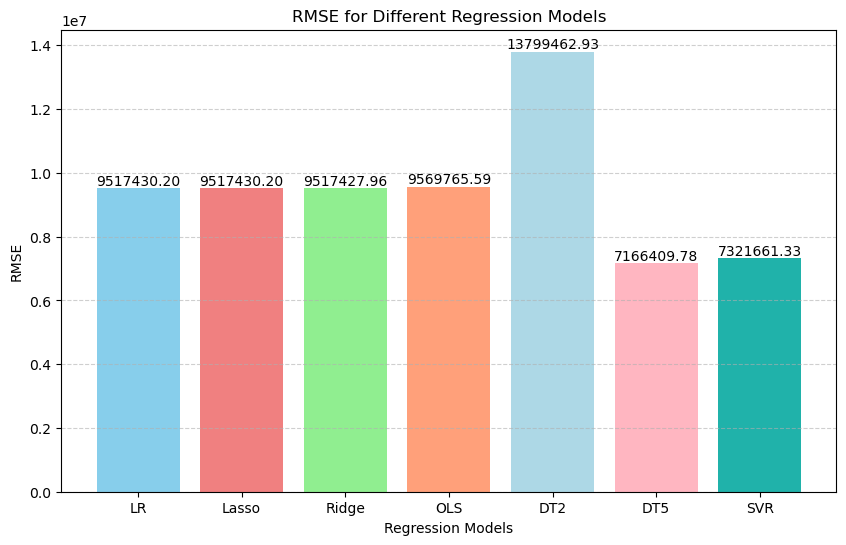

In [497]:
rmse_values = [rmse, rmsel, rmser, rmseS, rmsedr1, rmsedr2, rmsesv]
models = ['LR', 'Lasso', 'Ridge', 'OLS', 'DT2', 'DT5', 'SVR']

plt.figure(figsize=(10, 6))

colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightblue', 'lightpink', 'lightseagreen']

for i, model in enumerate(models):
    plt.bar(model, rmse_values[i], color=colors[i])

plt.xlabel('Regression Models')
plt.ylabel('RMSE')
plt.title('RMSE for Different Regression Models')
plt.grid(axis='y', linestyle='--', alpha=0.6)

for i, value in enumerate(rmse_values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()


# 6.0 Classification

## Data Analysis - Scatter Plot

In [500]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler

df1 = df[ (df.GrossFloorArea_M2 <= 40000) & (df.TotalEnergy2017 <= 5000000)]
df1=df1[df1.BuildingType == 'Retail Building']
df1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 17 to 1132
Data columns (total 27 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   BuildingName                                    69 non-null     object 
 1   BuildingAddress                                 79 non-null     object 
 2   BuildingType                                    79 non-null     object 
 3   BuildingSize                                    79 non-null     object 
 4   PublicSector                                    79 non-null     object 
 5   YearObtainedTOP_CSC                             79 non-null     float64
 6   GreenMarkYearofAward                            13 non-null     float64
 7   GreenMarkRating                                 79 non-null     object 
 8   GreenMarkStatus                                 79 non-null     object 
 9   GrossFloorArea_M2                         

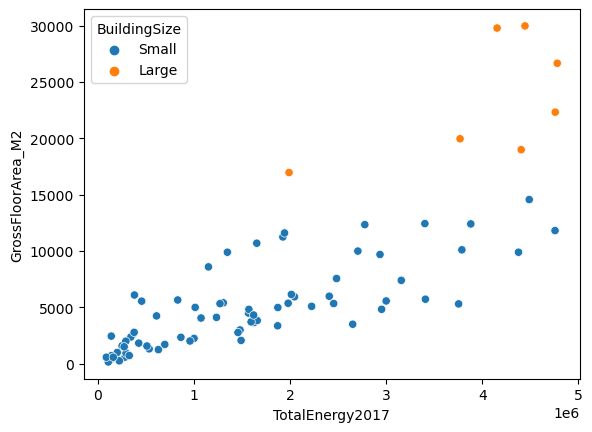

In [501]:
sb.scatterplot(data=df1, x='TotalEnergy2017', y='GrossFloorArea_M2', hue='BuildingSize')
plt.show()

## Preprocessing

In [502]:
columns_to_include = ['BuildingSize',
                      'GrossFloorArea_M2',
                      'TotalEnergy2017']
df1 = df1[columns_to_include].dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 17 to 1132
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BuildingSize       79 non-null     object 
 1   GrossFloorArea_M2  79 non-null     float64
 2   TotalEnergy2017    79 non-null     float64
dtypes: float64(2), object(1)
memory usage: 2.5+ KB


In [503]:
y = df1['BuildingSize'].values
X = df1.drop(['BuildingSize'], axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [504]:
y_train

array(['Small', 'Small', 'Large', 'Small', 'Small', 'Small', 'Small',
       'Small', 'Small', 'Large', 'Small', 'Large', 'Small', 'Small',
       'Small', 'Small', 'Small', 'Small', 'Small', 'Large', 'Small',
       'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small',
       'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Large',
       'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small',
       'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small',
       'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small',
       'Small', 'Small', 'Small', 'Large', 'Small', 'Small', 'Large'],
      dtype=object)

### 6.1 Perceptron Classifier

In [505]:
clf = Perceptron(tol=1e-3, random_state=4)
clf.fit(X_train, y_train)

accuclf = clf.score(X_test, y_test)
print("Accuracy:", accuclf)
weightsclf= clf.coef_[0]
interceptclf = clf.intercept_[0]

Accuracy: 1.0


### 6.2 Naive Bayes

In [506]:
from sklearn.naive_bayes import GaussianNB
nbclf = GaussianNB()
nbclf.fit(X_train, y_train)

accugnb = nbclf.score(X_test, y_test)
print("Accuracy:", accugnb)


Accuracy: 1.0


### 6.3 Decision Tree Classifier

In [507]:
from sklearn.tree import DecisionTreeClassifier
dtclf = DecisionTreeClassifier(random_state=0)
dtclf.fit(X_train, y_train)

accudt = dtclf.score(X_test, y_test)
print("Accuracy:", accudt)

Accuracy: 1.0


### 6.4 Support Vector Machine

In [508]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
svcclf = make_pipeline(StandardScaler(), SVC(gamma='auto',C=1,kernel='rbf'))
svcclf.fit(X_train, y_train)

accusvc = svcclf.score(X_test, y_test)
print("Accuracy:", accusvc)

Accuracy: 1.0


### 6.5 Logistic Regression

In [509]:
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression(random_state=0)
logistic_reg.fit(X_train, y_train)

acculr = logistic_reg.score(X_test, y_test)
print("Accuracy:", acculr)

y_pred= logistic_reg.predict(X_test)

Accuracy: 0.75


# 7.0 Classifier Model Comparison

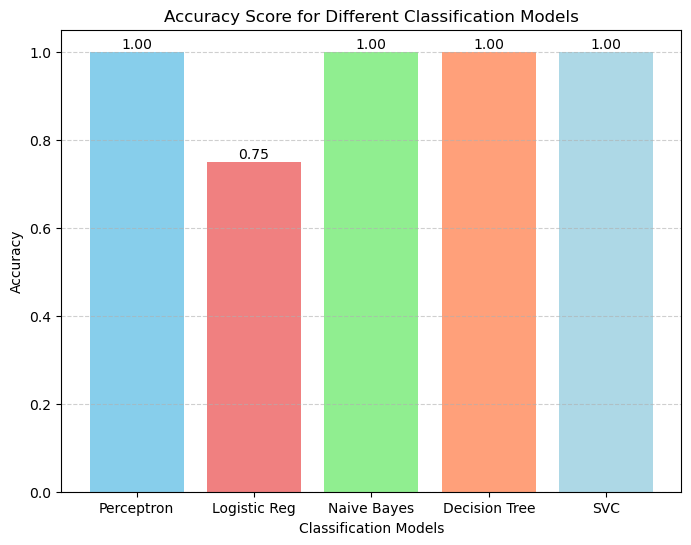

In [510]:
acc_values = [accuclf,acculr,accugnb,accudt,accusvc]
models = ['Perceptron','Logistic Reg', 'Naive Bayes', 'Decision Tree', 'SVC']

plt.figure(figsize=(8, 6))

colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightblue', 'lightpink', 'lightseagreen']

for i, model in enumerate(models):
    plt.bar(model, acc_values[i], color=colors[i])

plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Score for Different Classification Models')
plt.grid(axis='y', linestyle='--', alpha=0.6)

for i, value in enumerate(acc_values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()